In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

In [2]:
# Data points from the digitizer
x = np.array([0.0010180097511801845, 0.0013070104796093687, 0.001590561212780344,
              0.002042102417146829, 0.002529884971601279, 0.0030242671703095136,
              0.004096407011113996, 0.005166284215610408, 0.005959280095830789,
              0.00725212224721817, 0.00821729128754924, 0.008984385372349017,
              0.01, 0.013070104796093681, 0.016192068244593703, 0.01970487314856146,
              0.025754475704543072, 0.029182082376440918, 0.040239369086248984,
              0.049851062445855215, 0.05959280095830788, 0.0712382395041967,
              0.08515939318253841, 0.08515939318253841, 0.10180097511801844,
              0.20421024171468286, 0.3134180693285875, 0.4245286227393859,
              0.5074886767657292, 0.7929116634226816, 1.0180097511801844,
              4.023936908624899, 5.166284215610409, 6.287089059917239,
              10.180097511801845, 13.545122770005646, 15.90561212780344,
              21.544346900318832, 23.555537752607332, 29.18208237644092,
              45.59473844166777, 59.59280095830788, 76.51048064273168,
              91.46191917411912, 130.70104796093673, 207.88801735640968,
              395.27488847331057, 498.5106244585521, 1018.0097511801845,
              4985.106244585521, 9823.08861816593, 47251.82693586871,
              96493.07000034103, 197048.7314856144, 291820.8237644092,
              472518.2693586871, 575029.2314386386, 687399.6431179508])

y = np.array([4154862.9315448045, 2808365.3644661885, 2038348.0889055287,
              1479459.5404556892, 1036248.5062537139, 779385.9586576249,
              526804.5102589077, 368986.35746089363, 277522.9920291265,
              208731.32447169494, 174689.99855573283, 151499.90870666917,
              136150.93199225838, 88808.31053642055, 62203.44431179016,
              45148.06849584519, 30516.595595401814, 24646.348057119234,
              14971.238603210048, 10486.21014304043, 8172.804945018875,
              6839.928255402978, 4964.508843492902, 4964.508843492902,
              3869.268484249972, 1283.0613496326669, 700.4236871084305,
              440.88964303372376, 343.6231970980561, 181.0222500608412,
              136.15093199225868, 23.784206113089297, 19.209017607907324,
              14.971238603210047, 8.469056916178774, 6.839928255402971,
              5.931928071561079, 4.4615373810823655, 3.60330505479362,
              3.238241828993077, 2.112235162353464, 1.646246426921197,
              1.3777653482012073, 1.073810966713053, 0.8672500426996962,
              0.5268045102589066, 0.41058403825329814, 0.3823615617468503,
              0.29800723235589527, 0.23226265247660477, 0.25844678498546847,
              0.32000343426356537, 0.3088095493815999, 0.2494061833872409,
              0.07701901110479853, 0.025539741358798915, 0.03162277660168379,
              0.05590139946933167])

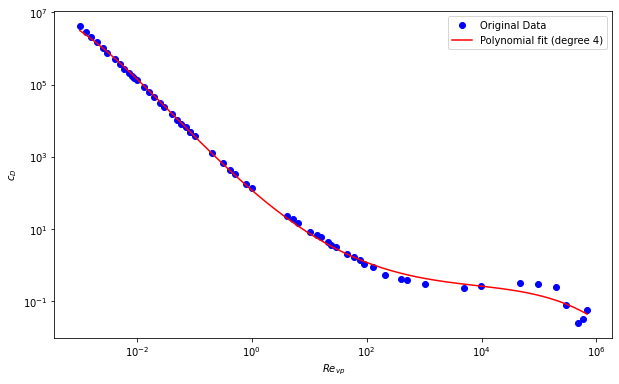

In [5]:
# Fit a polynomial of degree 4 
degree = 4

coefficients = np.polyfit(np.log10(x), np.log10(y), degree)

# Create a polynomial object
poly = np.poly1d(coefficients)

# Generate values for plotting
x_fit = np.logspace(np.log10(min(x)), np.log10(max(x)), 500)
y_fit = 10**poly(np.log10(x_fit))

# Plot the data and the fit
plt.figure(figsize=(10, 6))
plt.loglog(x, y, 'bo', label='Original Data')
plt.loglog(x_fit, y_fit, 'r-', label=f'Polynomial fit (degree {degree})')
plt.xlabel('$Re_{vp}$')
plt.ylabel('$c_D$')
plt.legend()
plt.show()

In [6]:
# Display the coefficients of the polynomial
print("Polynomial coefficients (in log-log space):")
print(poly)

# Print the equation explicitly
equation = ""
for i, coef in enumerate(coefficients[::-1]):
    if i == 0:
        equation += f"{coef:.3e}"
    else:
        equation += f" + ({coef:.3e}) * log10(Re_vp)^{i}"

print(f"Equation (in log-log space): log10(C_d) = {equation}")

Polynomial coefficients (in log-log space):
           4           3          2
-0.004918 x + 0.02525 x + 0.1545 x - 1.372 x + 2.081
Equation (in log-log space): log10(C_d) = 2.081e+00 + (-1.372e+00) * log10(Re_vp)^1 + (1.545e-01) * log10(Re_vp)^2 + (2.525e-02) * log10(Re_vp)^3 + (-4.918e-03) * log10(Re_vp)^4


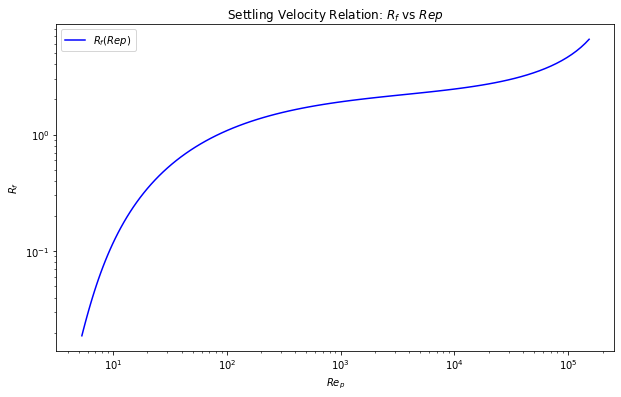

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Empirical polynomial coefficients for log10(c_D) as a function of log10(Re_vp)
coefficients = [-0.004918, 0.02525, 0.1545, -1.372, 2.081]

# Create a polynomial object in log-log space
poly = np.poly1d(coefficients)

# Function to calculate c_D from Re_vp


def calculate_cd(Re_vp):
    log_cd = poly(np.log10(Re_vp))
    return 10**log_cd

# Function to calculate R_f


def calculate_rf(cd):
    return np.sqrt(4 / (3 * cd))

# Function to calculate Rep from Re_vp and R_f


def calculate_rep(Re_vp, R_f):
    return Re_vp / R_f


# Example Re_vp values (can use your data range)
Re_vp_values = np.logspace(-1, 6, 100)  # Adjust range as necessary

# Calculate c_D for each Re_vp
cd_values = calculate_cd(Re_vp_values)

# Calculate R_f for each c_D
rf_values = calculate_rf(cd_values)

# Calculate Rep for each Re_vp
rep_values = calculate_rep(Re_vp_values, rf_values)

# Plot R_f vs Rep
plt.figure(figsize=(10, 6))
plt.loglog(rep_values, rf_values, 'b-', label='$R_f(Rep)$')
plt.xlabel('$Re_p$')
plt.ylabel('$R_f$')
plt.title('Settling Velocity Relation: $R_f$ vs $Rep$')
plt.legend()
plt.show()

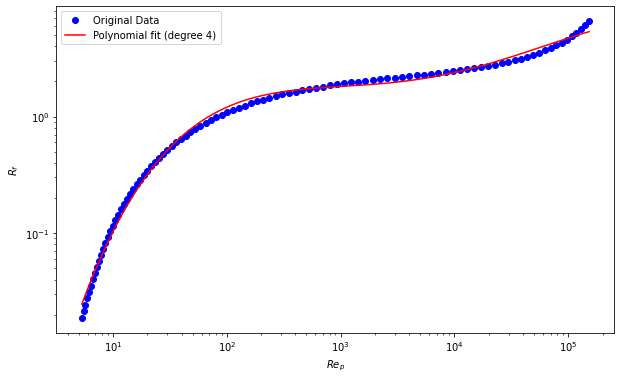

Polynomial coefficients for log-log fit of R_f vs Rep:
          4         3        2
-0.02493 x + 0.388 x - 2.15 x + 5.174 x - 4.374
Equation (in log-log space): log10(R_f) = -4.374e+00 + (5.174e+00) * log10(Re_p)^1 + (-2.150e+00) * log10(Re_p)^2 + (3.880e-01) * log10(Re_p)^3 + (-2.493e-02) * log10(Re_p)^4


In [8]:
# Fit a polynomial to R_f vs Rep
degree = 4  
rf_poly_coefficients = np.polyfit(
    np.log10(rep_values), np.log10(rf_values), degree)

# Create a polynomial object
rf_poly = np.poly1d(rf_poly_coefficients)

# Generate values for plotting the fitted curve
rep_fit = np.logspace(np.log10(min(rep_values)),
                      np.log10(max(rep_values)), 500)
rf_fit = 10**rf_poly(np.log10(rep_fit))

# Plot the original data and the fitted polynomial
plt.figure(figsize=(10, 6))
plt.loglog(rep_values, rf_values, 'bo', label='Original Data')
plt.loglog(rep_fit, rf_fit, 'r-', label=f'Polynomial fit (degree {degree})')
plt.xlabel('$Re_p$')
plt.ylabel('$R_f$')
plt.legend()
plt.show()

# Display the polynomial coefficients
print("Polynomial coefficients for log-log fit of R_f vs Rep:")
print(rf_poly)

# Print the equation explicitly
rf_equation = ""
for i, coef in enumerate(rf_poly_coefficients[::-1]):
    if i == 0:
        rf_equation += f"{coef:.3e}"
    else:
        rf_equation += f" + ({coef:.3e}) * log10(Re_p)^{i}"

print(f"Equation (in log-log space): log10(R_f) = {rf_equation}")

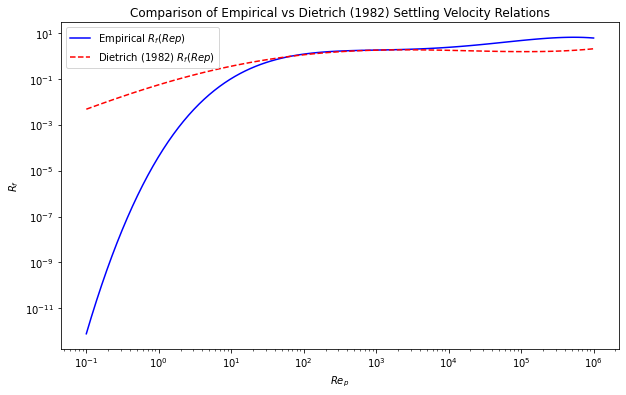

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Dietrich formula for R_f


def dietrich_rf(Re_p):
    ln_Rep = np.log(Re_p)
    return np.exp(-2.891394 + 0.952696 * ln_Rep - 0.056835 * ln_Rep**2 - 0.002892 * ln_Rep**3 + 0.000245 * ln_Rep**4)


# Generate Rep values (same as the range used in your empirical fit)
rep_values = np.logspace(-1, 6, 100)  # Adjust the range as needed

# Calculate R_f using the Dietrich formula
rf_dietrich = dietrich_rf(rep_values)

# Plot the comparison between your empirical relation and the Dietrich formula
plt.figure(figsize=(10, 6))

# Plot your empirical R_f values
rf_fit = 10**rf_poly(np.log10(rep_values))  # From your polynomial fit
plt.loglog(rep_values, rf_fit, 'b-', label='Empirical $R_f(Rep)$')

# Plot the Dietrich R_f values
plt.loglog(rep_values, rf_dietrich, 'r--', label='Dietrich (1982) $R_f(Rep)$')

# Customize the plot
plt.xlabel('$Re_p$')
plt.ylabel('$R_f$')
plt.title('Comparison of Empirical vs Dietrich (1982) Settling Velocity Relations')
plt.legend()
plt.show()

In [10]:
# Example specific Rep values for comparison 
specific_rep = [65, 100, 250, 500, 1000, 2000, 16000]

# Calculate R_f for both empirical and Dietrich formulas
rf_empirical = 10**rf_poly(np.log10(specific_rep))
rf_dietrich_specific = dietrich_rf(specific_rep)

# Print the comparison
for rep, rf_emp, rf_diet in zip(specific_rep, rf_empirical, rf_dietrich_specific):
    print(
        f"Rep: {rep:.1f}, Empirical Rf: {rf_emp:.6f}, Dietrich Rf: {rf_diet:.6f}")

Rep: 65.0, Empirical Rf: 0.961853, Dietrich Rf: 0.959999
Rep: 100.0, Empirical Rf: 1.202732, Dietrich Rf: 1.125633
Rep: 250.0, Empirical Rf: 1.575469, Dietrich Rf: 1.458016
Rep: 500.0, Empirical Rf: 1.723461, Dietrich Rf: 1.657831
Rep: 1000.0, Empirical Rf: 1.808387, Dietrich Rf: 1.789948
Rep: 2000.0, Empirical Rf: 1.892705, Dietrich Rf: 1.848135
Rep: 16000.0, Empirical Rf: 2.668133, Dietrich Rf: 1.704172
